<a href="https://colab.research.google.com/github/Aayush3466/UnsupervisedML/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
           "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
           "OD280/OD315 of diluted wines", "Proline"]

In [18]:
data = pd.read_csv(url, header=None, names=columns)

            Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

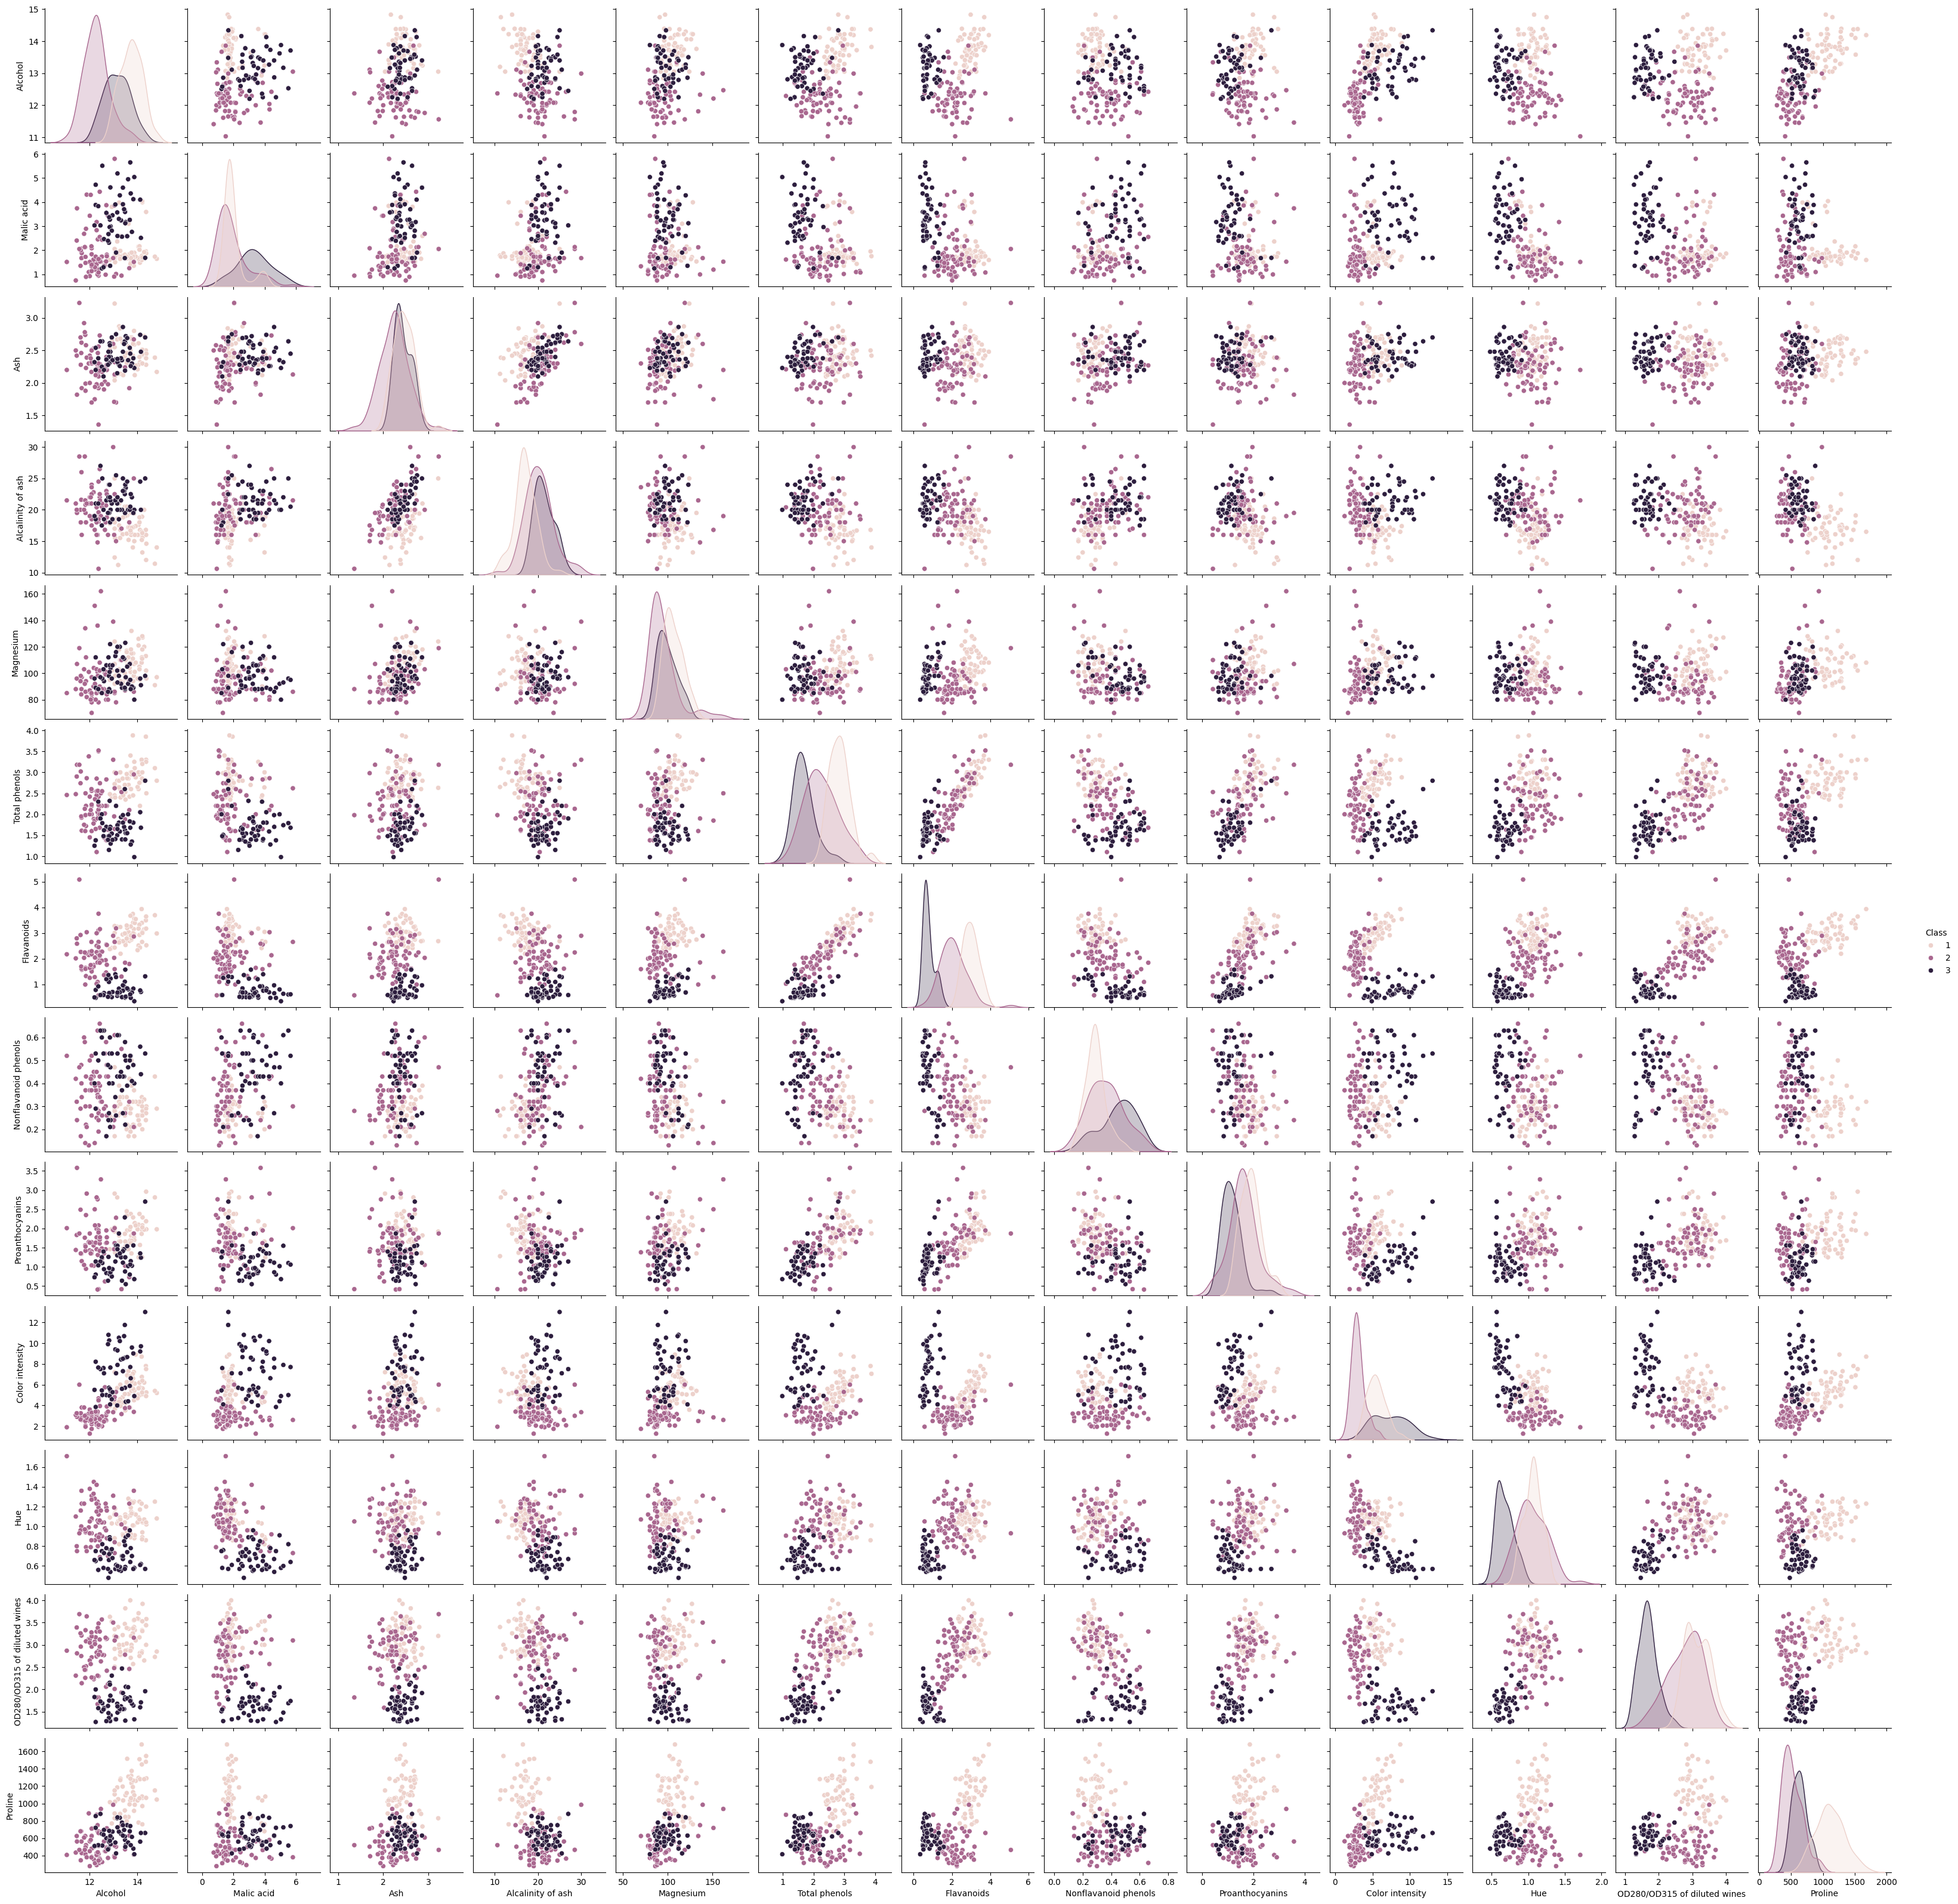

In [19]:
# Initial data exploration
print(data.describe())
sns.pairplot(data, hue='Class')
plt.show()


In [20]:
# Step 3: Data Preprocessing
# Separate features and target
features = data.drop('Class', axis=1)

In [21]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [22]:
# Step 4: Clustering Models

# Function to plot the k-distance graph for determining the optimal eps
def plot_k_distance_graph(data, k):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances[:, k-1], axis=0)
    plt.plot(distances)
    plt.title('K-Distance Graph')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.show()

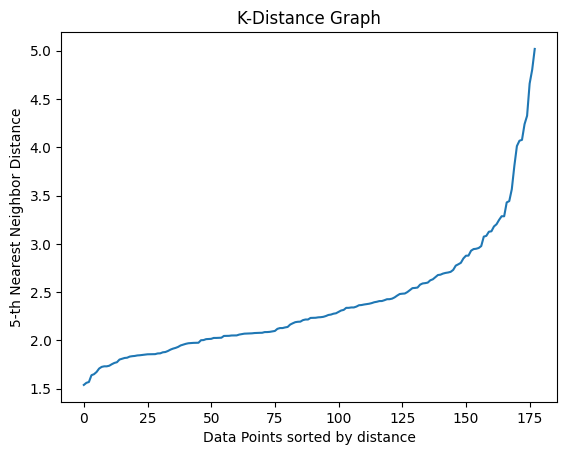

In [23]:
# Plot the k-distance graph to determine the optimal eps
plot_k_distance_graph(scaled_features, 5)


In [24]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
print(f"Silhouette Score for K-Means: {kmeans_silhouette}")

Silhouette Score for K-Means: 0.2848589191898987


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_features)
hierarchical_silhouette = silhouette_score(scaled_features, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}")

Silhouette Score for Hierarchical Clustering: 0.2774439826952265


In [26]:
# DBSCAN Clustering with initial parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

In [27]:
# Exclude noise points for silhouette score calculation
core_samples_mask = dbscan_labels != -1

if len(set(dbscan_labels[core_samples_mask])) > 1:  # At least 2 clusters are required for silhouette score
    dbscan_silhouette = silhouette_score(scaled_features[core_samples_mask], dbscan_labels[core_samples_mask])
    print(f"Silhouette Score for DBSCAN (excluding noise points): {dbscan_silhouette}")
else:
    print("Silhouette Score for DBSCAN: Cannot be calculated due to insufficient clusters after excluding noise points")

Silhouette Score for DBSCAN: Cannot be calculated due to insufficient clusters after excluding noise points


In [28]:
# Adjusting DBSCAN parameters based on k-distance graph and reevaluating
dbscan = DBSCAN(eps=0.6, min_samples=4)  # Adjusted parameters
dbscan_labels = dbscan.fit_predict(scaled_features)

In [29]:
#Exclude noise points for silhouette score calculation
core_samples_mask = dbscan_labels != -1

if len(set(dbscan_labels[core_samples_mask])) > 1:  # At least 2 clusters are required for silhouette score
    dbscan_silhouette = silhouette_score(scaled_features[core_samples_mask], dbscan_labels[core_samples_mask])
    print(f"Silhouette Score for DBSCAN (excluding noise points): {dbscan_silhouette}")
else:
    print("Silhouette Score for DBSCAN: Cannot be calculated due to insufficient clusters after excluding noise points")

Silhouette Score for DBSCAN: Cannot be calculated due to insufficient clusters after excluding noise points


Text(0.5, 1.0, 'K-Means Clustering')

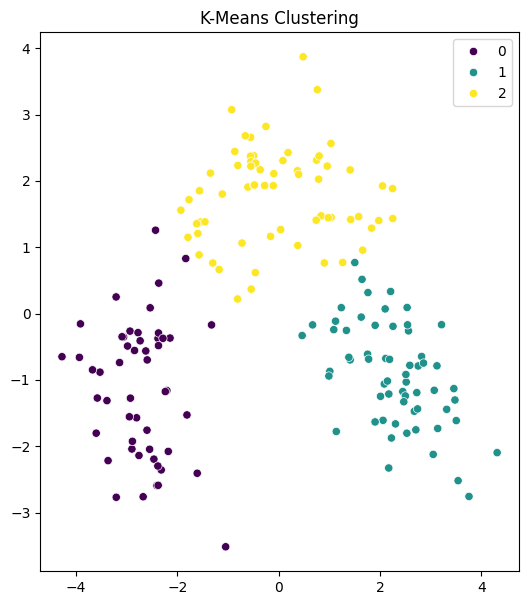

In [30]:
# Step 5: Dimensionality Reduction and Plotting
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(21, 7))

# Plot K-Means Clustering
plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering')

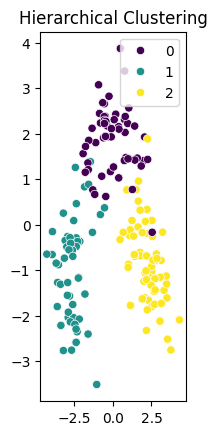

In [31]:
# Plot Hierarchical Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title('Hierarchical Clustering')


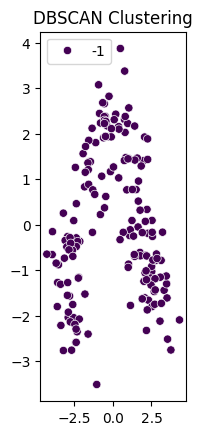

In [32]:
# Plot DBSCAN Clustering
plt.subplot(1, 3, 3)
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')

plt.show()